# Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import squarify 
import datetime as dt
from wordcloud import WordCloud
%matplotlib inline

# Carga de datos

Debido a que se trabajara con grandes cantidades de data se definio cada uno de los tipos de datos de los datos pasados por archivo para no sobrecargar al parser de los archivos csv y ahorrar espacio de memoria al conocer mejor que cantidad de memoria se necesitara.

In [2]:
data_types_clicks = {'advertiser_id':'category' , 'action_id':'category' , 'source_id':'category', 'created':str,\
                     'countrycode':'category','latitude':np.float16, 'longitude':np.float16, 'wifi_conection':'category',\
                     'carrier_id':'category', 'trans_id':'category', 'os_minor':'category', 'agent_devise':'category', \
                     'os_major':'category', 'specs_brnad':'category', 'brand':'category', 'timeToClick': np.float16, 'touchX':np.float16, \
                     'touchY':np.float16, 'ref_type':'category', 'ref_hash':'category'}

data_types_installs = { "created" : str, "application_id" : 'category', "ref_type" : 'category',"click_hash" : 'category',\
                       "attributed" : bool, "implicit": bool, "device_countrycode" : 'category',"device_brand" : 'category',\
                       "device_model" : 'category', "session_user_agent" : 'category', "user_agent": 'category',"event_uuid":\
                       'category', "kind" : str, "wifi" : 'category', "trans_id" : 'category', "ip_address" : 'category', \
                       "device_language" : 'category'}

data_types_events = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', 'application_id':'category',\
                     'attributed':bool, 'device_os':'category', 'device_os_version':'category', 'device_brand':'category',\
                     'device_model':'category','device_city':'category', 'session_user_agent':'category', 'trans_id':\
                     'category', 'user_agent':'category', 'event_uuid':'category','carrier':'category','kind':'category',\
                     'wifi':"category",'connection_type':'category','ip_address':'category','device_language':'category',\
                     'device_countrycode':'category'}

data_types_auctions = { "auction_type_id" : 'category', "country" : 'category', "date" : str, "device_id" : 'category', \
                      "platform" : 'category', "ref_type_id" : 'category', "source_id" : 'category'}

In [3]:
clicks = pd.read_csv("/home/anichu/Downloads/tp1/clicks.csv", dtype = data_types_clicks) 

In [4]:
installs =  pd.read_csv("/home/anichu/Downloads/tp1/installs.csv", dtype = data_types_installs)

In [5]:
events = pd.read_csv("/home/anichu/Downloads/tp1/events.csv", dtype = data_types_events)

In [6]:
auctions = pd.read_csv("/home/anichu/Downloads/tp1/auctions.csv", dtype = data_types_auctions)

# Analisis preliminar

In [338]:
# Cambiamos el formato de aquellos datos que contengan fecha a datetime para luego trabajar mas comodamente.

clicks['created'] = pd.to_datetime(clicks['created'])
installs['created'] = pd.to_datetime(installs['created'])
auctions['date'] = pd.to_datetime(auctions['date'])

## Clicks

In [8]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563477,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.015625,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.109375,0.053986,0.423096,1891515180541284343,4368617728156436525


In [9]:
clicks.describe(include='all')

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351,0.0,26351,26351,2.635100e+04,26351.000000,26351.000000,26351,26340,26351,26339,3.243000e+03,26339,2.635100e+04,6235,2.297700e+04,23011.000000,23011.000000,26351,26351
unique,7,0.0,11,26347,NaN,NaN,NaN,1,55,26351,28,NaN,12,NaN,13,NaN,NaN,NaN,4,17119
top,3,NaN,0,2019-03-10 05:02:10.703000+00:00,NaN,NaN,NaN,False,4.0,zzntVZIjkQfpaRyum_VRhZNGZ6LTW_M,3.3786399484966047e+18,NaN,3.072849339937028e+18,NaN,2.0,NaN,NaN,NaN,1891515180541284343,4063522808706112974
freq,26263,NaN,17009,2,NaN,NaN,NaN,26351,4569,1,6922,NaN,7430,NaN,2027,NaN,NaN,NaN,25549,41
first,NaN,NaN,NaN,2019-03-05 01:17:30.663000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-03-13 23:59:59.298000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.333597e+18,1.207031,1.070312,NaN,NaN,NaN,NaN,4.171028e+18,NaN,1.299055e+18,NaN,inf,0.639160,1.478516,NaN,NaN
std,NaN,NaN,NaN,NaN,2.089000e+05,0.004375,0.001891,NaN,NaN,NaN,NaN,2.460496e+18,NaN,1.149672e+18,NaN,inf,0.302002,2.623047,NaN,NaN
min,NaN,NaN,NaN,NaN,6.333597e+18,1.205078,1.058594,NaN,NaN,NaN,NaN,4.513618e+16,NaN,3.921844e+17,NaN,1.699829e-02,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.333597e+18,1.206055,1.070312,NaN,NaN,NaN,NaN,1.975183e+18,NaN,3.921844e+17,NaN,2.914062e+00,0.426025,0.182983,NaN,NaN


In [10]:
# Notamos todos los valores de action_id nos nulos por lo que quitamos tal columna
del clicks['action_id']

In [11]:
#Notamos que todos los clicks se realizaron sin wi-fi
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [12]:
# Notamos que todos los clicks realiados se realizaron sin wi-fi, luego borramos tal columna
wifi_connection = False
del clicks['wifi_connection']

In [13]:
# Notamos que todos los clicks se realizaron en el mismo pais
clicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [14]:
# Luego nos guardamos el dato del pais y eliminamos tal columna
country_code = 6333597102633388268
del clicks['country_code']

## Installs

In [15]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [16]:
installs.describe(include='all')

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
count,3412,3412,3412,3.412000e+03,0.0,3412,3412,3412,1047,3411,3364,1729,865,865,1729,6,3412,3378
unique,3412,31,2,NaN,0.0,1,2,2,27,415,12,334,865,20,2,4,2717,30
top,2019-03-09 04:34:41.291000,7,1891515180541284343,NaN,NaN,False,False,6333597102633388268,3.083058605577787e+17,2.33194661091417e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,ffc389df-f154-4b88-b5f3-d61498e4f801,af_app_opened,true,{hash},1992632945768888579,3.3013777759776993e+18
freq,1,947,2080,NaN,NaN,3412,2547,1820,472,759,1729,393,1,428,1377,3,33,1484
first,2019-03-05 00:00:38.219000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:54:00.526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.598202e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.663828e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,4.958527e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.268353e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Notamos todos los valores de action_id y trans_id nos nulos por lo que quitamos tal columna
del installs['click_hash']
del installs['trans_id']

#Notamos que ninguno de los installs fueron atribuidos a Jammp
attributed = False
del installs['attributed']

## Events

In [18]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [19]:
events.describe(include='all')

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 23:00:08.146,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,fffe3715-a834-4e1f-8857-d54ede5c8721,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898


In [20]:
del events['device_countrycode']

## Auctions

In [21]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [22]:
auctions.describe(include='all')

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
count,0.0,19571319,19571319,19571319,19571319,19571319,19571319
unique,0.0,1,19570963,206977,2,2,5
top,NaN,6333597102633388268,2019-03-13 18:19:02.095780,633139769114048761,1,1,0
freq,NaN,19571319,2,27762,15541825,15541825,13354597
first,NaN,NaN,2019-03-05 00:52:33.352526,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-03-13 23:59:59.997032,NaN,NaN,NaN,NaN


In [23]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    category
country            category
date               datetime64[ns]
device_id          category
platform           category
ref_type_id        category
source_id          category
dtypes: category(6), datetime64[ns](1)
memory usage: 328.9 MB


In [24]:
auctions.isnull()['auction_type_id'].value_counts()

True    19571319
Name: auction_type_id, dtype: int64

In [25]:
# Notamos que todos los datos de auction_type_id son invalidos por lo que borramos tal columna
del auctions['auction_type_id']

In [26]:
# Notamos que como en los otros archivos, los datos corresponden a los de un mismo pais, luego borramos tal dato.
del auctions['country']

In [27]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


# Analisis de datos

### Posicion de clickeo en la pantallade una publicidad

In [28]:
# Para poder graficar, borramos todos los valores invalidos de touchX y touchY que son aproximadamente un 15% de los datos.
positions = (clicks[['touchX', 'touchY']]).dropna()

In [29]:
positions.describe()

,touchX,touchY
count,23011.000000,23011.000000
mean,0.638672,1.478516
std,0.302002,2.623047
min,0.000000,0.000000
25%,0.426025,0.182983
50%,0.726074,0.645020
75%,0.900879,0.991211
max,1.000000,16.593750


In [30]:
# Notamos que el valor maximo de touchY es mucho mayor al valor promedio de los valores.

#Analizaremos el porcentaje de los valores de 'touchY' que sean mayores que 3.
positions["touchY"].apply(lambda x: x>3).mean()*100

10.564512624397029

In [31]:
# Tomaremos para lograr una mejor representacion los valoresde touchY menores a 3.
positions = positions[positions.touchY<3]

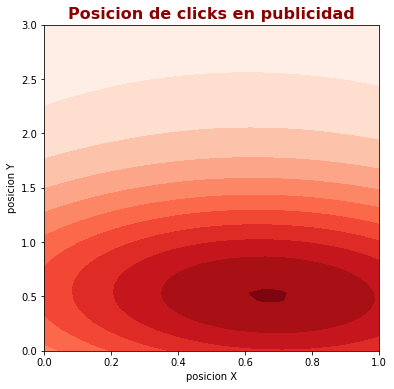

In [32]:
# Grafico
f, ax = plt.subplots(figsize=(6,6))

ax = sns.kdeplot(positions['touchX'], positions['touchY'], cmap="Reds", shade=True, bw=.60, shade_lowest=True)

ax.set_xlabel('posicion X')
ax.set_ylabel('posicion Y')
ax.set_title('Posicion de clicks en publicidad', fontweight='bold', fontdict={'color':'darkred','size': 16})

plt.axis([0,1,0,3])

plt.show()

**Colorario** : La mayoria de los clicks se realizan en la parte inferior y central de la publicidad.


### Tiempo que se tarda en clickear una publicidad

In [33]:
# Quitamos los valores invalidos
time = clicks['timeToClick'].dropna()
len_time = len(time)

# variable que indica la cant de segundos a analalizar
sec = 60*1

In [34]:
# Acotaremos nuestro analisis al primer minuto de aparicion de una publicidad.
time = time[time<=sec]

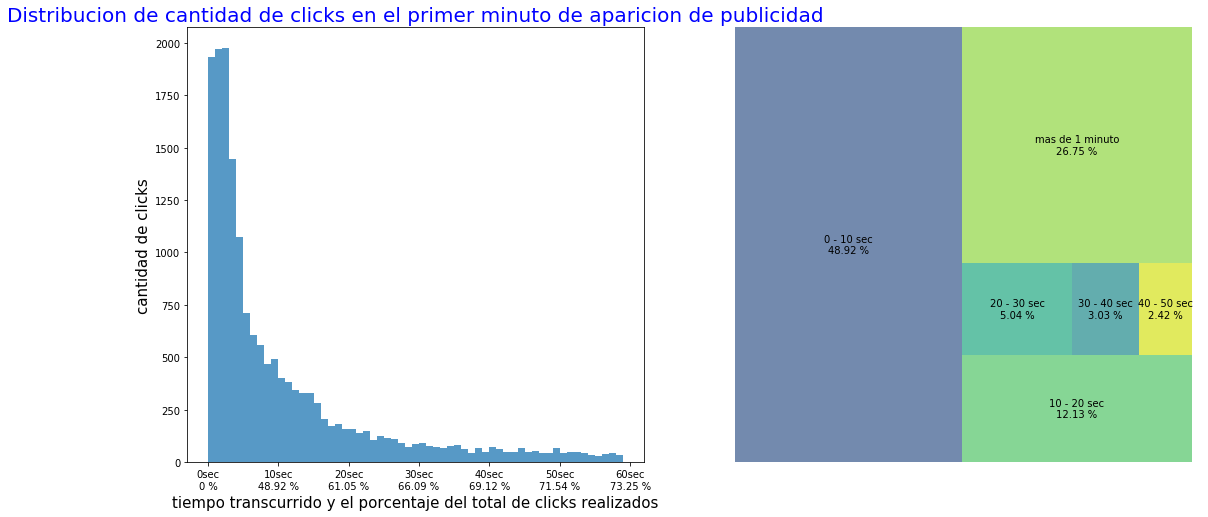

In [49]:
# Grafico

f, ax = plt.subplots(1,2, figsize=(18, 8))

# Subplot 1

xticks = ["","0sec\n0 %"]
porcentaje = 0
for i in range(0,sec-9,10):
    cantidad = len(time[time>=i][time<i+10])
    porcentaje += (cantidad/len_time)*100
    xticks.append(str(i+10) + "sec\n" + str(np.around(porcentaje,decimals=2))+' %')
    

ax[0].set_title('Distribucion de cantidad de clicks en el primer minuto de aparicion de publicidad', fontdict={'color':'b','size': 20})
ax[0].set_xlabel('tiempo transcurrido y el porcentaje del total de clicks realizados', fontdict={'size': 15})
ax[0].set_ylabel('cantidad de clicks', fontdict={'size': 15})

ax[0].set_xticklabels(xticks)

ax[0].hist(time, bins= range(sec), alpha=0.75)


# Subplot 2

labels = []
sizes = []

for i in range(0,sec-19,10):
    
    cantidad = len(time[time>=i][time<i+10])
    porcentaje = (cantidad/len_time)*100
    porcentaje = np.around(porcentaje,decimals=2)
    
    sizes.append(cantidad)
    labels.append(str(i) + " - " + str(i+10) + " sec\n" + str(porcentaje)+' %')
    
cantidad = len_time - len(time)
porcentaje = (cantidad/len_time)*100
labels.append("mas de 1 minuto\n"+str(np.around(porcentaje,decimals=2))+' %')
sizes.append(cantidad)

ax[1] = squarify.plot(sizes=sizes, label=labels, alpha=.7)
ax[1].axis('off')

plt.show()

**Observacion** : La mitad de los clicks se realizan en los primeros 10 segundos desde la creacion de la publicidad. Ademas, notamos que mantener una publicidad por mas de un minuto resulta poco productivo ya que muy pocos clicks se realizaron pasando ese tiempo.

### Rango de version de OS soportado por usuarios por tipo de referencia.

In [36]:
# Recortamos los datos que vamos a utilizar y quitamos los valores nulos.
OS_version_clicks = clicks[['ref_type','os_major','os_minor']].dropna()

In [37]:
OS_version_clicks['ref_type'].value_counts()

1891515180541284343    25538
1494519392962156891      738
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

In [38]:
# Notamos que hay 4 categories de datos cuando deberian haber 2. Luego quitamos los dos categories con menos datos.
OS_version_clicks = OS_version_clicks.sort_values('ref_type')

In [39]:
# Dividimos los datos segun ref_tpye (Apple o Google)
OS_version_ref_1 = OS_version_clicks[:738]
OS_version_ref_2 = OS_version_clicks[738:26276]

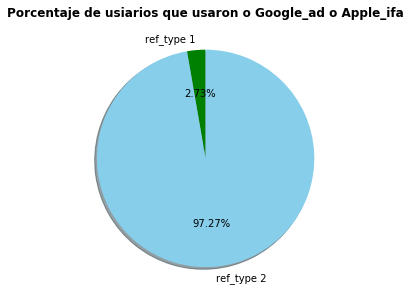

In [40]:
# Grafico

f, ax= plt.subplots(1,1,figsize=(5, 5))

plt.pie([738,26276], labels=["ref_type 1", "ref_type 2"], autopct='%1.2f%%', shadow=True, startangle=90, colors = ('green','skyblue'))
plt.title('Porcentaje de usiarios que usaron o Google_ad o Apple_ifa', fontweight='bold')
plt.show()

In [41]:
# Funcion que convierte el valor x en flotante, lo divide por 10 a la exponente pasado por parametro y lo devuelve con la cantidad de decimales deseado.
def reducir_numero(x, decimal, exponente):
    x = float(x)/(10**exponente)
    return np.around(x, decimals=decimal)


# Datos del ref_type 1
OS_version1 = pd.DataFrame()
OS_version1['os_minor'] = OS_version_ref_1['os_minor'].apply(lambda x: reducir_numero(x,4,18))
OS_version1['os_major'] = OS_version_ref_1['os_major'].apply(lambda x: reducir_numero(x,4,18))

OS_version1 = OS_version1.groupby(['os_minor', 'os_major'],as_index=False).size()

index1 = OS_version1.index
cant_versions1 = len(OS_version1)

xmin1 = [ index1[i][0] for i in range(cant_versions1)]
xmax1 = [ index1[i][1] for i in range(cant_versions1)]

my_range1 = OS_version1.values


# Datos del ref_type 2
OS_version2 = pd.DataFrame()
OS_version2['os_minor'] = OS_version_ref_2['os_minor'].apply(lambda x: reducir_numero(x,4,18))
OS_version2['os_major'] = OS_version_ref_2['os_major'].apply(lambda x: reducir_numero(x,4,18))

OS_version2 = OS_version2.groupby(['os_minor', 'os_major'],as_index=False).size()

index2 = OS_version2.index
cant_versions2 = len(OS_version2)-1

xmin2 = [ index1[i][0] for i in range(cant_versions2)]
xmax2 = [ index1[i][1] for i in range(cant_versions2)]

my_range2 = OS_version2.values[:-1]

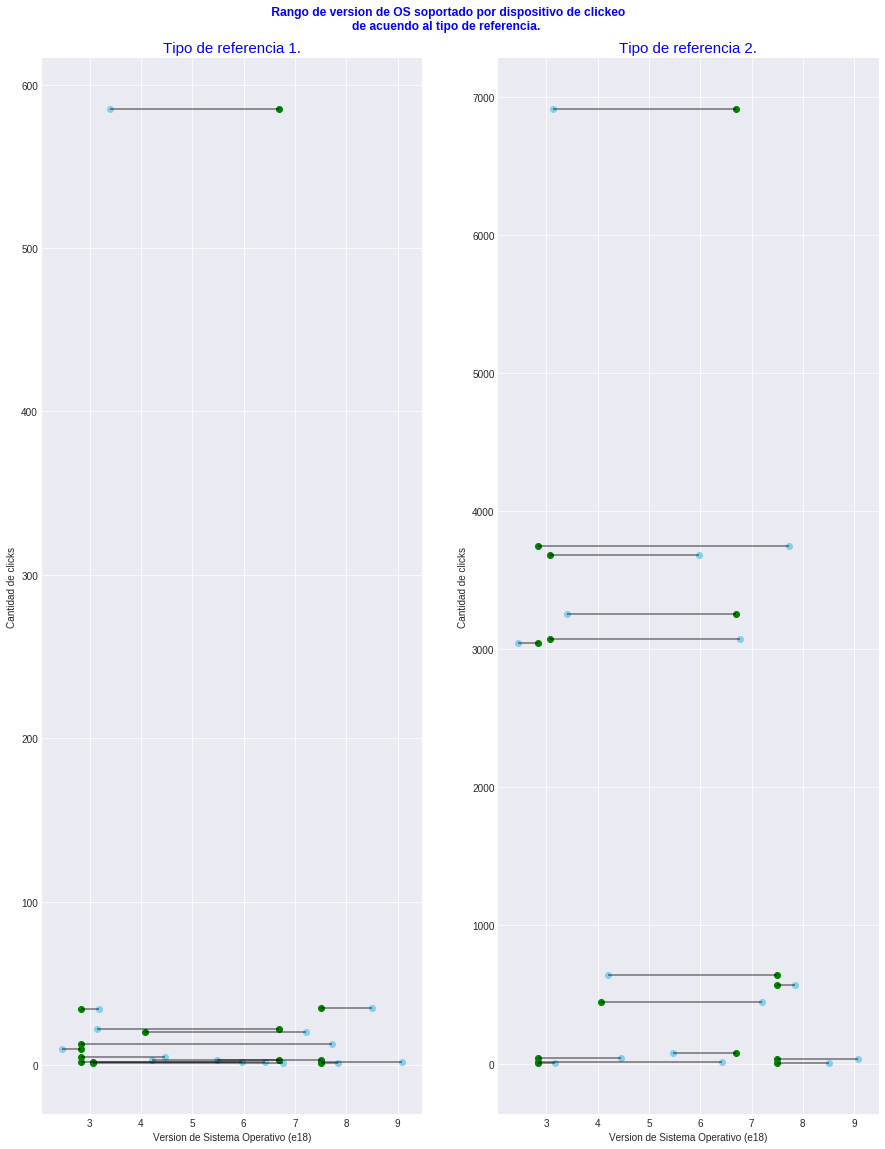

In [466]:
#Grafico

f, ax= plt.subplots(1,2,figsize=(15, 18))

f.suptitle(" Rango de version de OS soportado por dispositivo de clickeo\nde acuendo al tipo de referencia.", fontweight='bold', fontdict={'color':'b','size': 20})
f.subplots_adjust(top=0.94)

#Subplot 1

ax[0].grid(True, axis='x',  linestyle='-')
    
ax[0].hlines(y=my_range1, xmin=xmin1, xmax=xmax1, color='k', alpha=0.4, linewidth=2)
ax[0].scatter(xmin1, my_range1, color='skyblue', label='OS menor')
ax[0].scatter(xmax1, my_range1, color='green' , label='OS mayor')

ax[0].set_title("Tipo de referencia 1.", fontdict={'color':'b','size': 15},)
ax[0].set_xlabel('Version de Sistema Operativo (e18)')
ax[0].set_ylabel('Cantidad de clicks')


#Subplot 2

ax[1].grid(True, axis='x',  linestyle='-')
    
ax[1].hlines(y=my_range2, xmin=xmin2, xmax=xmax2, color='k', alpha=0.4, linewidth=2)
ax[1].scatter(xmin2, my_range2, color='skyblue', label='OS menor')
ax[1].scatter(xmax2, my_range2, color='green' , label='OS mayor')

ax[1].set_title("Tipo de referencia 2.", fontdict={'color':'b','size': 15})
ax[1].set_xlabel('Version de Sistema Operativo (e18)')
ax[1].set_ylabel('Cantidad de clicks')

plt.show()

**Observacion**:
El rango de versiones mas comun es aquel que incluye las versiones ni tan antigias, ni aquellas tan nuevas. Ademas, en el tipo de referencia 2 se realizan mas clicks con rango de versiones mas nuevas que el tipo de referencia 1.

### Dia de la semana y momento del dia en la que se realizan mayor cantidad de click

In [288]:
# Función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return fecha.weekday()

# Se crean columnas con los dias de la semana.
weekdays = pd.DataFrame()
weekdays['advertiser_id'] = clicks['advertiser_id']
weekdays['fecha'] = clicks['created']
weekdays['dia_semana'] = weekdays['fecha'].map(fecha_a_dia)

In [289]:
weekdays['hora'] = weekdays['fecha'].map(lambda x: int(x.strftime("%H")))

weekdays['maniana'] = weekdays['hora'].map(lambda x: x>=5 and x<12)
weekdays['mediodia'] = weekdays['hora'].map(lambda x: x>=12 and x<17)
weekdays['tarde'] = weekdays['hora'].map(lambda x: x>=17 and x<21)
weekdays['noche'] = weekdays['hora'].map(lambda x: x>=21 and x<5)

In [292]:
turnos = [[],[],[],[]]
for i in range(7):
    turnos[0].append(weekdays.loc[weekdays.dia_semana==i].loc[weekdays.maniana].size)
    turnos[1].append(weekdays.loc[weekdays.dia_semana==i].loc[weekdays.mediodia].size)
    turnos[2].append(weekdays.loc[weekdays.dia_semana==i].loc[weekdays.tarde].size)
    turnos[3].append(weekdays.loc[weekdays.dia_semana==i].loc[weekdays.noche].size)

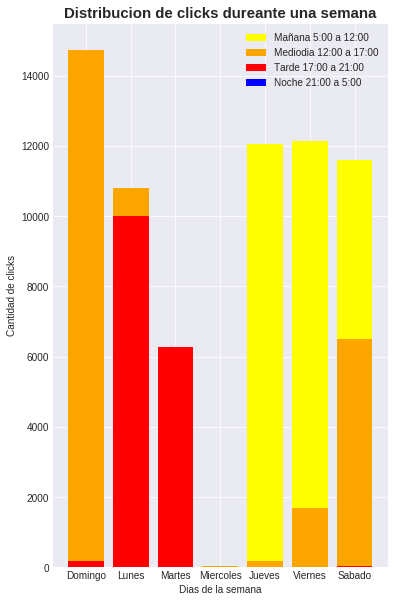

In [293]:
# Grafico

semana_labels = ['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']

f, ax= plt.subplots(1,1,figsize=(6, 10))

ax.bar(semana_labels,turnos[0], label='Mañana 5:00 a 12:00', color ='yellow')
ax.bar(semana_labels,turnos[1], label='Mediodia 12:00 a 17:00', color = 'orange')
ax.bar(semana_labels,turnos[2], label='Tarde 17:00 a 21:00', color ='red')
ax.bar(semana_labels,turnos[3], label='Noche 21:00 a 5:00', color='b')

plt.xlabel('Dias de la semana')
plt.ylabel('Cantidad de clicks')
plt.title('Distribucion de clicks dureante una semana', fontweight='bold', fontdict={'size': 15})
plt.legend()
plt.show()

### Datos del cliente de Jammp con mas clicks

In [294]:
clicks_por_clientes = weekdays.groupby('advertiser_id').size()
clientes = weekdays['advertiser_id'].unique()
porcentaje_cliente_3 = (clicks_por_clientes[3]/len(weekdays))*100
porcentaje_resto_clientes = 100-porcentaje_cliente_3

In [295]:
dias = [i for i in range(7)]
clicks_por_dia = weekdays[ weekdays['advertiser_id']==marcas[3] ].groupby('dia_semana').size()

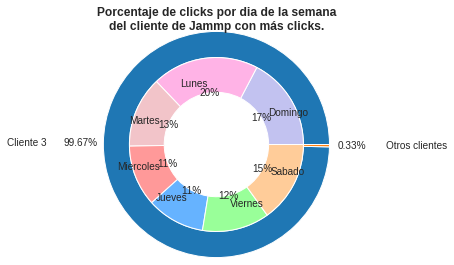

In [296]:
# Grafico 
fig, ax = plt.subplots()
ax.set_title("Porcentaje de clicks por dia de la semana\ndel cliente de Jammp con más clicks.", fontweight='bold')

# Anillo de marcas
mypie = ax.pie([porcentaje_cliente_3, porcentaje_resto_clientes], radius=1.3, labels=["Cliente 3", "Otros clientes"], autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5)
plt.setp( mypie[0], width=0.3, edgecolor='white')

# Anillo de dias de la semana
colors = ['#c2c2f0','#ffb3e6', '#f2c4c9','#ff9999','#66b3ff','#99ff99','#ffcc99']
mypie2 = ax.pie(clicks_por_dia, radius=1.3-0.3, labels=semana_labels, labeldistance=0.7, autopct='%1.f%%', colors =colors)
plt.setp( mypie2[0], width=0.4, edgecolor='white')

plt.show()

### Cantidad de clicks por compañia movil

In [297]:
# Creo un texto que tenga tantas veces repetido el carrier_id como veces se han ustilizado para realizar un click
text = ""

compania = clicks['carrier_id'].unique()
cant = clicks.groupby(by='carrier_id').size()

for i in range(55):
    text += ('empresa'+str(compania[i])[:-2]+" ")*cant[i]

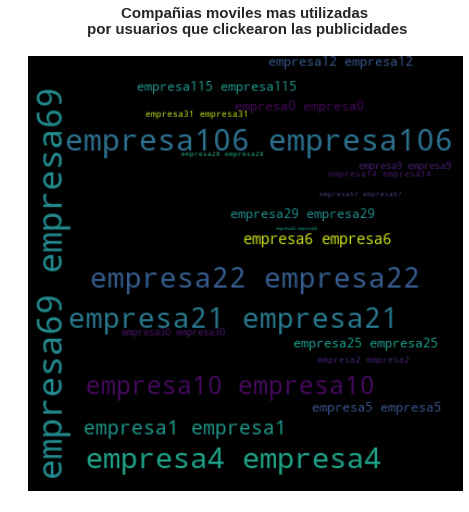

In [314]:
#Grafico

f, ax= plt.subplots(1,1,figsize=(8, 8))

wordcloud = WordCloud(width=400, height=400, margin=0).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Compañias moviles mas utilizadas\n por usuarios que clickearon las publicidades\n", fontweight='bold', fontdict={'size': 15})

plt.show()

### Cantidad de intalaciones por hora del dia con y sin wifi

In [454]:
installs_por_dia = installs[['wifi', 'created']]
installs_por_dia = installs_por_dia.dropna()
installs_por_dia['hora'] = installs_por_dia['created'].map(lambda x: int(x.strftime("%H")))

In [455]:
bool_wifi = installs_por_dia['wifi'].unique()
con_wifi = installs_por_dia[installs_por_dia.wifi==bool_wifi[0]].groupby('hora').size()
sin_wifi = installs_por_dia[installs_por_dia.wifi==bool_wifi[1]].groupby('hora').size()

In [460]:
sin_wifi.at[6]=0
sin_wifi = sin_wifi.sort_index()
con_wifi = con_wifi.sort_index()

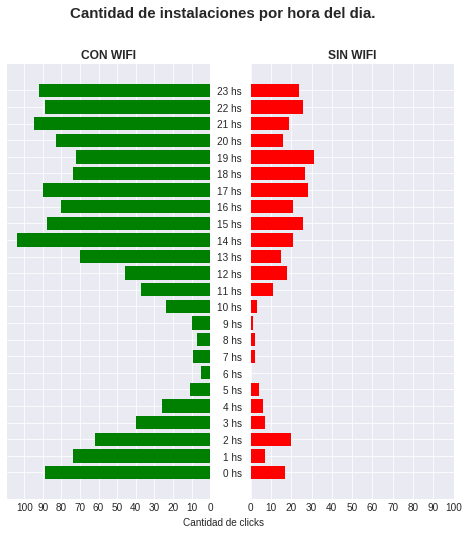

In [565]:
#Grafico

fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(8, 8))
plt.suptitle('Cantidad de instalaciones por hora del dia.', fontweight='bold', size=15)
y = range(24)
x = range(0,max(max(sin_wifi),max(con_wifi)),10)

# con wifi
axes[0].barh(y, con_wifi, align='center', color='green')
axes[0].invert_xaxis()

axes[0].set_title('CON WIFI', fontweight='bold')
axes[0].set_xticks(x)
axes[0].tick_params(axis='y', labelleft=False)

# sin wifi
axes[1].barh(y, sin_wifi, align='center', color='red')

axes[1].set_title('SIN WIFI', fontweight='bold' )
axes[1].set_xticks(x)
axes[1].set_yticks(y)
axes[1].set_yticklabels([('{} hs  '.format(i)) for i in range(24)])
axes[1].tick_params(axis='y', labelright=False, labelleft = True)

fig.text(0.5, 0.08, 'Cantidad de clicks', ha='center')

plt.show()

### Clasificacion de instalaciones por sistema operativo y modelo y marca del dispositivo